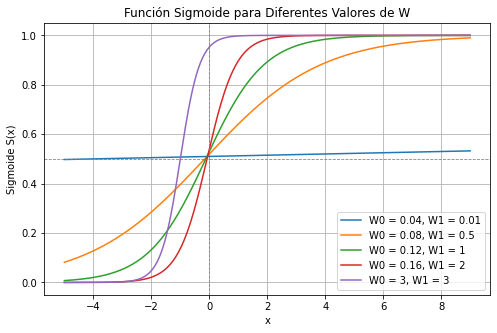

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide con un parámetro de escala alpha
def sigmoid(x1, w0, w1):
    x0 = 1
    return 1 / (1 + np.exp((-1)*(w0*x0+w1*x1)))

# Valores de x
xs = np.linspace(-5, 9, 400)

# Diferentes valores de alpha para ver cómo cambia la pendiente
w1s = [0.01, 0.5, 1, 2, 3]
w0s = [0.04, 0.08, 0.12, 0.16, 3]
# Graficar la función sigmoide para diferentes valores de alpha
plt.figure(figsize=(8, 5))

for w0, w1 in zip(w0s, w1s):
    ys = sigmoid(xs, w0, w1)
    plt.plot(xs, ys, label=f'W0 = {w0}, W1 = {w1}')

# Configurar el gráfico
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8)  # Línea guía en y=0.5
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Línea guía en x=0
plt.xlabel("x")
plt.ylabel("Sigmoide S(x)")
plt.title("Función Sigmoide para Diferentes Valores de W")
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()